# AERONET

```{hint} 
<a href='https://dust.ltpy.adamplatform.eu/hub/user-redirect/lab/tree/01_observations/2_ground-based/21_AERONET.ipynb' target='_blank'>Execute the notebook on the training platform >></a>
```

The <a href='https://aeronet.gsfc.nasa.gov/new_web/index.html' target='_blank'>AERONET (AErosol RObotic NETwork)</a> project is a federation of ground-based remote sensing aerosol networks established by NASA and LOA-PHOTONS (CNRS) and is greatly expanded by collaborators from national agencies, institutes, universities, individual scientists, and partners. The program provides a long-term (more than 25 years), continuous and readily accessible public domain database of aerosol optical, microphysical and radiative properties for aerosol research and characterization, validation of satellite retrievals, and synergism with other databases. The network imposes standardization of instruments, calibration, processing and distribution.

AERONET collaboration provides globally distributed observations of spectral aerosol optical Depth (AOD), inversion products, and precipitable water in diverse aerosol regimes. Aerosol optical depth data are computed for three data quality levels: Level 1.0 (unscreened), Level 1.5 (cloud-screened), and Level 2.0 (cloud screened and quality-assured). Inversions, precipitable water, and other AOD-dependent products are derived from these levels and may implement additional quality checks.

You can see an overview of all available AERONET Site Names <a href='https://aeronet.gsfc.nasa.gov/cgi-bin/draw_map_display_aod_v3?long1=-180&long2=180&lat1=-90&lat2=90&multiplier=2&what_map=4&nachal=1&formatter=0&level=3&place_code=10&place_limit=0' target='_blank'>here</a>.

```{admonition} Basic facts
**Spatial coverage**: `Observation stations worldwide` <br>
**Temporal resolution**:  `sub-daily and daily` <br>
**Temporal coverage**: `since 1993` <br>
**Data format**: `txt` <br>
**Versions**: `Level 1.0 (unscreened)`, `Level 1.5 (cloud-screened)`, `Level 2.0 (cloud screened and quality-assured)`
```

```{admonition} How to access the data
AERONET offers a web service which allows you to request and save aeronet data via wget, which is a command to download files from the internet. The AERONET web service endpoint is available under `https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3` and a detailed documentation of how to construct requests can be found <a href='https://aeronet.gsfc.nasa.gov/print_web_data_help_v3_new.html' target='_blank'>here</a>.

The first part of this notebook (1 - Download AERONET data for a specific station and time period) shows you how to request AERONET data with a `wget` command.
```


<hr>

**Load libraries**

In [1]:
import wget
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

<hr>

## Download AERONET data for a specific station and time period

AERONET offers a web service which allows you to request and save aeronet data via `wget`, which is a command to download files from the internet. The AERONET web service endpoint is available under <a href='https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3' target='_blank'>https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3</a> and a detailed documentation of how to construct requests can be found <a href='https://aeronet.gsfc.nasa.gov/print_web_data_help_v3_new.html'>here</a>.

An example request from the website looks like this:

`wget --no-check-certificate  -q  -O test.out "https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3?site=Cart_Site&year=2000&month=6&day=1&year2=2000&month2=6&day2=14&AOD15=1&AVG=10"`

In this request, you use `wget` to download data from the webservice. You tailor your request with a set of keywords which you concatenate to the service endpoint with `&`. However, constructing such requests manually can be quite cumbersome. For this reason, we will show you an approach how you can dynamically generate and request AERONET data from the web service with Python.


As a first step, let us create a Python dictionary in which we store all the parameters we would like to use for the request as dictionary keys. You can initiate a dictionary with curled brackets `{}`. Below, we specify the following parameters:
* `endpoint`: Endpoint of the AERONET web service
* `station`: Name of the AERONET station
* `year`: year 1 of interest
* `month`: month 1 of interest
* `day`: day 1 of interest
* `year2`: year 2 of interest
* `month2`: month 2 of interest
* `day2`: day 2 of interest
* `AOD15`: data type, other options include `AOD10`, `AOD20`, etc.
* `AVG`: data format, `AVG=10` - all points, `AVG=20` - daily averages

Please note, that there are additional parameters that can be set, e.g. `hour`. The keywords below are those we will need for requesting all data points of Aerosol Optical Depth Level 1.5 data for the station Palma de Mallorca for April 2024.

In [2]:
data_dict = {
    'endpoint': 'https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3',
    'station':'Palma_de_Mallorca',
    'year': 2024,
    'month': 4,
    'day': 1,
    'year2': 2024,
    'month2': 4,
    'day2': 30,
    'AOD15': 1,
    'AVG': 10
}


In a next step, we construct the final string for the wget request with the `format` function. You construct a string by adding the dictionary keys in curled brackets. At the end of the string, you provide the dictionary key informatoin to the string with the `format()` function. A print of the resulting url shows, that the format function replaced the information in the curled brackets with the data in the dictionary.

In [3]:
url = '{endpoint}?site={station}&year={year}&month={month}&day={day}&year2={year2}&month2={month2}&day2={day2}&AOD15={AOD15}&AVG={AVG}'.format(**data_dict)
url

'https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3?site=Palma_de_Mallorca&year=2024&month=4&day=1&year2=2024&month2=4&day2=30&AOD15=1&AVG=10'

Now we are ready to request the data with the function `download()` from the wget Python library. You have to pass to the function the constructed url above together with a file path of where the downloaded that shall be stored. Let us store the data as `txt` file in the folder `../../eodata/2_observations/aeronet/`.

In [ ]:
wget.download(url, '../../eodata/2_observations/aeronet/202404_palma_aod15_10.txt')

Let us repeat the data request and let us also request the daily average of Aerosol Optical Depth for April 2024 for the station Palma de Mallorca. The parameter you have to change is `AVG`. By setting `20`, you indicate the request that you are interested in daily averages. You can make the required changes in the dictionary above and re-run the data request. Make sure to also change the name of the output file to e.g. `202404_palma_aod15_20.txt`.

## Read the observation data with pandas

The next step is now to read the downloaded txt file. Let us start with the file of all station measurements for the station Palma de Mallorca in April 2024. The file has the name `202404_palma_aod15_10.txt`. You can read `txt` files with the function `read_table` from the Python library `pandas`. If you inspect the txt file before (you can simply open it), you see that the first few lines contain information we do not need in the pandas dataframe. For this reason, we can set additonal keyword arguments that allow us to specify the columns and rows of interest:
* `delimiter`: specify the delimiter in the text file, e.g. comma
* `header`: specify the index of the row that shall be set as header.
* `index_col`: specify the index of the column that shall be set as index

You see below that the resulting dataframe has 738 rows and 113 columns.

In [4]:
df = pd.read_table('../../eodata/2_observations/aeronet/202404_palma_aod15_10.txt', delimiter=',', header=[7], index_col=1)
df

AERONET_Site Time(hh:mm:ss)  Day_of_Year  \
Date(dd:mm:yyyy)                                                  
01:04:2024        Palma_de_Mallorca       06:28:45         92.0   
01:04:2024        Palma_de_Mallorca       06:33:14         92.0   
01:04:2024        Palma_de_Mallorca       06:38:48         92.0   
01:04:2024        Palma_de_Mallorca       06:45:32         92.0   
01:04:2024        Palma_de_Mallorca       06:54:07         92.0   
...                             ...            ...          ...   
26:04:2024        Palma_de_Mallorca       05:46:02        117.0   
26:04:2024        Palma_de_Mallorca       05:57:55        117.0   
26:04:2024        Palma_de_Mallorca       06:10:18        117.0   
26:04:2024        Palma_de_Mallorca       10:47:58        117.0   
NaN                  </body></html>            NaN          NaN   

                  Day_of_Year(Fraction)  AOD_1640nm  AOD_1020nm  AOD_870nm  \
Date(dd:mm:yyyy)                                                             
01:04:2024                    92.269965    0.041108    0.049436   0.051678   
01:04:2024                    92.273079    0.052381    0.059683   0.061997   
01:04:2024                    92.276944    0.039431    0.046851   0.050017   
01:04:2024                    92.281620    0.035112    0.043531   0.045646   
01:04:2024                    92.287581    0.036402    0.044710   0.046792   
...                                 ...         ...         ...        ...   
26:04:2024                   117.240301    0.052985    0.075910   0.088771   
26:04:2024                   117.248553    0.047704    0.068911   0.080327   
26:04:2024                   117.257153    0.047260    0.068839   0.081149   
26:04:2024                   117.449977    0.033241    0.046344   0.053470   
NaN                                 NaN         NaN         NaN        NaN   

                  AOD_865nm  AOD_779nm  AOD_675nm  ...  \
Date(dd:mm:yyyy)                                   ...   
01:04:2024           -999.0     -999.0   0.062325  ...   
01:04:2024           -999.0     -999.0   0.071809  ...   
01:04:2024           -999.0     -999.0   0.060447  ...   
01:04:2024           -999.0     -999.0   0.056593  ...   
01:04:2024           -999.0     -999.0   0.057614  ...   
...                     ...        ...        ...  ...   
26:04:2024           -999.0     -999.0   0.127277  ...   
26:04:2024           -999.0     -999.0   0.115767  ...   
26:04:2024           -999.0     -999.0   0.118209  ...   
26:04:2024           -999.0     -999.0   0.073781  ...   
NaN                     NaN        NaN        NaN  ...   

                  Exact_Wavelengths_of_AOD(um)_380nm  \
Date(dd:mm:yyyy)                                       
01:04:2024                                    0.3805   
01:04:2024                                    0.3805   
01:04:2024                                    0.3805   
01:04:2024                                    0.3805   
01:04:2024                                    0.3805   
...                                              ...   
26:04:2024                                    0.3805   
26:04:2024                                    0.3805   
26:04:2024                                    0.3805   
26:04:2024                                    0.3805   
NaN                                              NaN   

                  Exact_Wavelengths_of_AOD(um)_340nm  \
Date(dd:mm:yyyy)                                       
01:04:2024                                    0.3407   
01:04:2024                                    0.3407   
01:04:2024                                    0.3407   
01:04:2024                                    0.3407   
01:04:2024                                    0.3407   
...                                              ...   
26:04:2024                                    0.3407   
26:04:2024                                    0.3407   
26:04:2024                                    0.3407   
26:04:2024                          

In the dataframe above, you see that missing data entries are filled with -999.0. Let us replace those as `NaN`. You can use the function `replace()` to do so. The resulting dataframe has now `NaN` (not a number) for all entries with missing data. This replacement facilitates the plotting of the data. 

In [5]:
df = df.replace(-999.0, np.nan)
df

AERONET_Site Time(hh:mm:ss)  Day_of_Year  \
Date(dd:mm:yyyy)                                                  
01:04:2024        Palma_de_Mallorca       06:28:45         92.0   
01:04:2024        Palma_de_Mallorca       06:33:14         92.0   
01:04:2024        Palma_de_Mallorca       06:38:48         92.0   
01:04:2024        Palma_de_Mallorca       06:45:32         92.0   
01:04:2024        Palma_de_Mallorca       06:54:07         92.0   
...                             ...            ...          ...   
26:04:2024        Palma_de_Mallorca       05:46:02        117.0   
26:04:2024        Palma_de_Mallorca       05:57:55        117.0   
26:04:2024        Palma_de_Mallorca       06:10:18        117.0   
26:04:2024        Palma_de_Mallorca       10:47:58        117.0   
NaN                  </body></html>            NaN          NaN   

                  Day_of_Year(Fraction)  AOD_1640nm  AOD_1020nm  AOD_870nm  \
Date(dd:mm:yyyy)                                                             
01:04:2024                    92.269965    0.041108    0.049436   0.051678   
01:04:2024                    92.273079    0.052381    0.059683   0.061997   
01:04:2024                    92.276944    0.039431    0.046851   0.050017   
01:04:2024                    92.281620    0.035112    0.043531   0.045646   
01:04:2024                    92.287581    0.036402    0.044710   0.046792   
...                                 ...         ...         ...        ...   
26:04:2024                   117.240301    0.052985    0.075910   0.088771   
26:04:2024                   117.248553    0.047704    0.068911   0.080327   
26:04:2024                   117.257153    0.047260    0.068839   0.081149   
26:04:2024                   117.449977    0.033241    0.046344   0.053470   
NaN                                 NaN         NaN         NaN        NaN   

                  AOD_865nm  AOD_779nm  AOD_675nm  ...  \
Date(dd:mm:yyyy)                                   ...   
01:04:2024              NaN        NaN   0.062325  ...   
01:04:2024              NaN        NaN   0.071809  ...   
01:04:2024              NaN        NaN   0.060447  ...   
01:04:2024              NaN        NaN   0.056593  ...   
01:04:2024              NaN        NaN   0.057614  ...   
...                     ...        ...        ...  ...   
26:04:2024              NaN        NaN   0.127277  ...   
26:04:2024              NaN        NaN   0.115767  ...   
26:04:2024              NaN        NaN   0.118209  ...   
26:04:2024              NaN        NaN   0.073781  ...   
NaN                     NaN        NaN        NaN  ...   

                  Exact_Wavelengths_of_AOD(um)_380nm  \
Date(dd:mm:yyyy)                                       
01:04:2024                                    0.3805   
01:04:2024                                    0.3805   
01:04:2024                                    0.3805   
01:04:2024                                    0.3805   
01:04:2024                                    0.3805   
...                                              ...   
26:04:2024                                    0.3805   
26:04:2024                                    0.3805   
26:04:2024                                    0.3805   
26:04:2024                                    0.3805   
NaN                                              NaN   

                  Exact_Wavelengths_of_AOD(um)_340nm  \
Date(dd:mm:yyyy)                                       
01:04:2024                                    0.3407   
01:04:2024                                    0.3407   
01:04:2024                                    0.3407   
01:04:2024                                    0.3407   
01:04:2024                                    0.3407   
...                                              ...   
26:04:2024                                    0.3407   
26:04:2024                                    0.3407   
26:04:2024                                    0.3407   
26:04:2024                          

To get a complete overview of all column information, you can print a list of all column headers. You can do this with the function `columns.to_list()`.

In [ ]:
df.columns.to_list()

If you would like to narrow down the selection of the dataframe, you can apply the `filter` function and filter the dataframe based on a given regular expression. For example, let us only select the columns that contain `Angstrom_Exponent` information and additionally only select the first 100 rows.

This selection shows you that the station does not provide measurements for each day. There are for example measurements on 4 April 2024 and then again on 6 April 2024. 

In [7]:
df.filter(regex='Angstrom*')[100:120]

440-870_Angstrom_Exponent  380-500_Angstrom_Exponent  \
Date(dd:mm:yyyy)                                                         
04:04:2024                         0.902502                   1.175958   
04:04:2024                         0.897283                   1.105490   
04:04:2024                         0.983186                   1.305356   
04:04:2024                         0.947711                   1.291653   
04:04:2024                         0.859491                   1.192126   
04:04:2024                         0.841150                   1.182702   
04:04:2024                         0.787851                   1.153126   
04:04:2024                         0.783507                   1.185565   
04:04:2024                         0.801492                   1.239917   
04:04:2024                         0.743544                   1.228251   
04:04:2024                         0.866019                   1.280413   
04:04:2024                         0.394367                   0.875876   
04:04:2024                         0.401067                   0.813242   
04:04:2024                         0.314514                   0.685278   
04:04:2024                         0.289643                   0.655636   
04:04:2024                         0.400938                   0.779899   
04:04:2024                         0.710957                   0.971658   
06:04:2024                         0.211010                   0.201703   
06:04:2024                         0.189744                   0.212554   
06:04:2024                         0.147998                   0.179586   

                  440-675_Angstrom_Exponent  500-870_Angstrom_Exponent  \
Date(dd:mm:yyyy)                                                         
04:04:2024                         0.873052                   0.875370   
04:04:2024                         0.894709                   0.855811   
04:04:2024                         1.026737                   0.931756   
04:04:2024                         0.979898                   0.888506   
04:04:2024                         0.888861                   0.803353   
04:04:2024                         0.877778                   0.788322   
04:04:2024                         0.837126                   0.722641   
04:04:2024                         0.801749                   0.740256   
04:04:2024                         0.816169                   0.749093   
04:04:2024                         0.750495                   0.696859   
04:04:2024                         0.842567                   0.839115   
04:04:2024                         0.407690                   0.359691   
04:04:2024                         0.420703                   0.363916   
04:04:2024                         0.341491                   0.286214   
04:04:2024                         0.298422                   0.267586   
04:04:2024                         0.398061                   0.372057   
04:04:2024                         0.656387                   0.717071   
06:04:2024                         0.181258                   0.213007   
06:04:2024                         0.157608                   0.190297   
06:04:2024                         0.123486                   0.144494   

                  340-440_Angstrom_Exponent  440-675_Angstrom_Exponent[Polar]  
Date(dd:mm:yyyy)                                                               
04:04:2024                         1.160272                               NaN  
04:04:2024                         1.114349                               NaN  
04:04:2024                         1.239793                               NaN  
04:04:2024                         1.180223                               NaN  
04:04:2024                         1.111934                               NaN  
04:04:2024                         1.095790                               NaN  
04:04:2024                         1.013124                               NaN  
04:04:2024                         1.071

## Visualize all points of AERONET AOD in Palma de Mallorca for April 2024

The next step is to visualize all points of Aerosol Optical Depth at different wavelengths in Palma de Mallorca for April 2024. We specifically want to plot the AOD information for which we have measurements, which are the following: `AOD_1640nm`, `AOD_1020nm`, `AOD_870nm`, `AOD_675nm`, `AOD_500nm`, `AOD_440nm`, `AOD_380nm` and `AOD_340nm`. 

You can use the built-in `plot()` function of the pandas library to define a line plot. With the `filter` function, you can select the dataframe columns you wish to visualize. The visualisation code below consists of five main parts:
* `Initiate a matplotlib figure`
* `Define a line plot with the built-in plot function of the pandas library`
* `Set title and axes label information`
* `Format axes ticks`
* `Add additional features, such as a grid or legend`

Below, you see that the Aerosol Optical Depth increases on 8 April 2024 as well as on 15th April 2024.

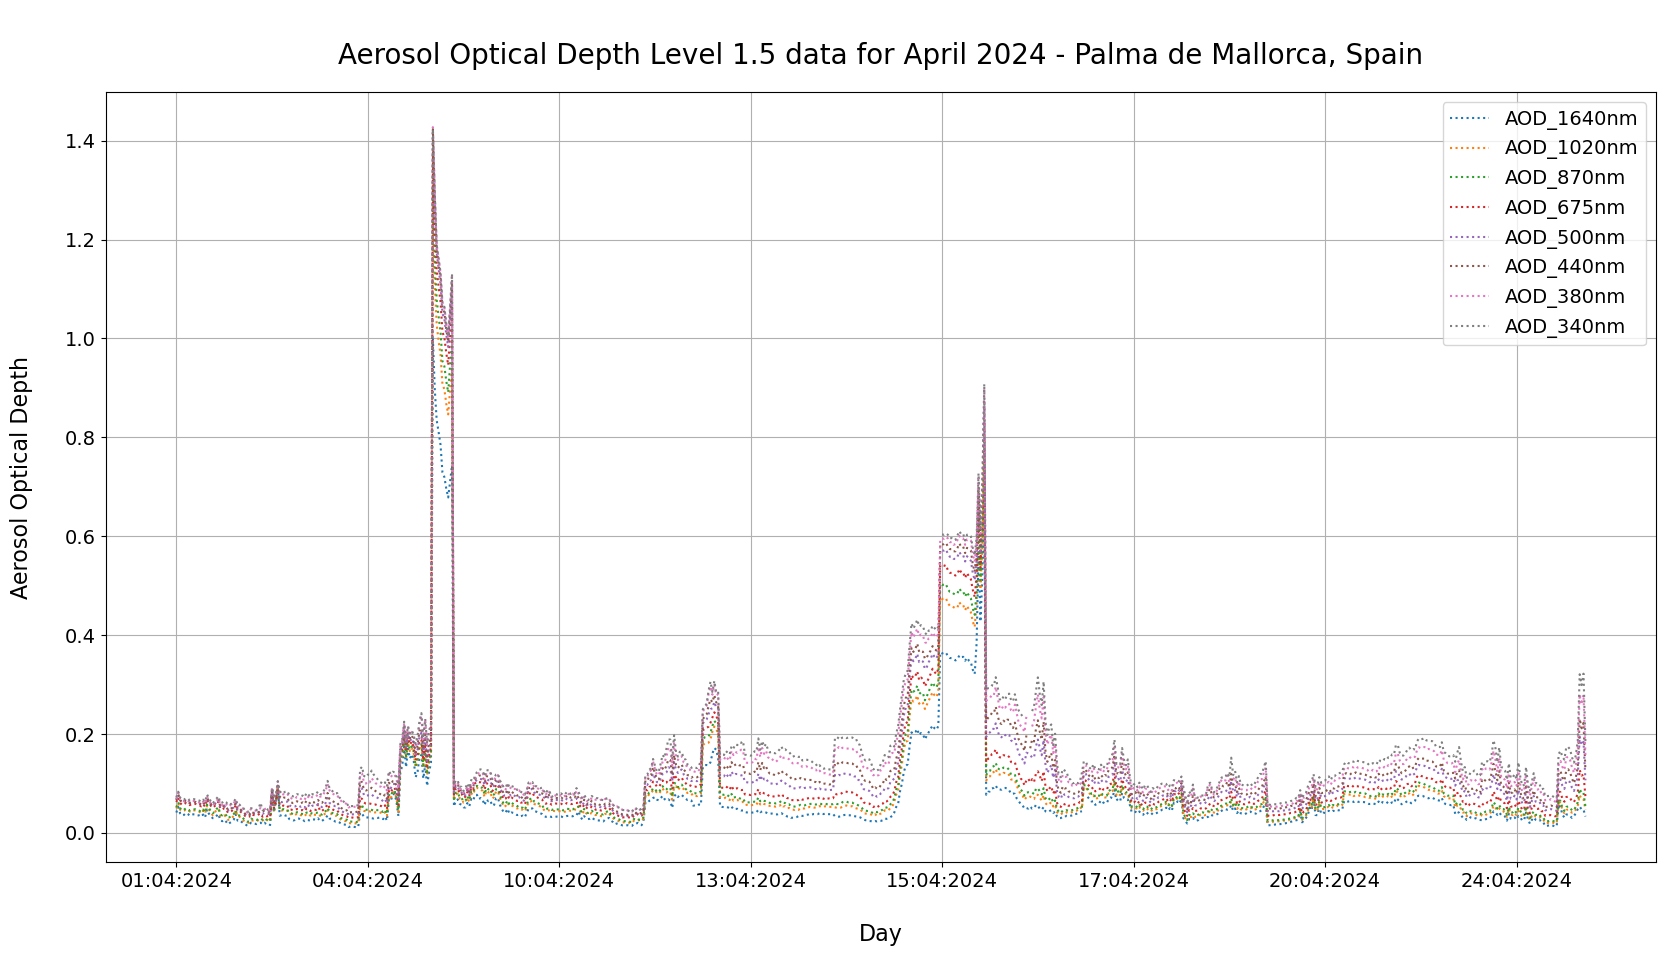

In [8]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax=plt.axes()

# Select pandas dataframe columns and define a line plot
df.filter(['AOD_1640nm', 
           'AOD_1020nm', 
           'AOD_870nm', 
           'AOD_675nm', 
           'AOD_500nm', 
           'AOD_440nm', 
           'AOD_380nm', 
           'AOD_340nm']).plot(ax=ax,
                             linestyle='dotted')


# Set title and axes lable information
plt.title('\nAerosol Optical Depth Level 1.5 data for April 2024 - Palma de Mallorca, Spain', fontsize=20, pad=20)
plt.ylabel('Aerosol Optical Depth\n', fontsize=16)
plt.xlabel('\nDay', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=14,loc=0)
plt.grid()


## Load and visualize daily AOD together with the Angstrom Exponent

In a next step, we would like to visualize the Aerosol Optical Depth information together with the Angstrom Exponent in the spectral interval of 440-480nm. The Angstrom Exponent is often used as a qualitative indicator of aerosol particle size.
To visualize both variables together, we load the daily averaged AERONET information, which we stored as txt file with the name `202404_palma_aod15_20.txt`. You can use again the funcction `read_table` from the pandas library to read the txt file.

Compared to the all point information, you see that the dataframe with the daily aggregated values has only 18 rows and 81 columns. As before, we only have daily aggregated values for days where the station had measurements.

In [9]:
df_daily = pd.read_table('../../eodata/2_observations/aeronet/202404_palma_aod15_20.txt', delimiter=',', header=[7], index_col=1)
df_daily

AERONET_Site Time(hh:mm:ss)  Day_of_Year  AOD_1640nm  \
Date(dd:mm:yyyy)                                                              
01:04:2024        Palma_de_Mallorca       12:00:00         92.0    0.029664   
02:04:2024        Palma_de_Mallorca       12:00:00         93.0    0.041282   
03:04:2024        Palma_de_Mallorca       12:00:00         94.0    0.024707   
04:04:2024        Palma_de_Mallorca       12:00:00         95.0    0.040750   
06:04:2024        Palma_de_Mallorca       12:00:00         97.0    0.137863   
08:04:2024        Palma_de_Mallorca       12:00:00         99.0    0.782080   
09:04:2024        Palma_de_Mallorca       12:00:00        100.0    0.052773   
10:04:2024        Palma_de_Mallorca       12:00:00        101.0    0.026755   
11:04:2024        Palma_de_Mallorca       12:00:00        102.0    0.068301   
12:04:2024        Palma_de_Mallorca       12:00:00        103.0    0.115575   
13:04:2024        Palma_de_Mallorca       12:00:00        104.0    0.040590   
14:04:2024        Palma_de_Mallorca       12:00:00        105.0    0.089264   
15:04:2024        Palma_de_Mallorca       12:00:00        106.0    0.386795   
16:04:2024        Palma_de_Mallorca       12:00:00        107.0    0.057714   
17:04:2024        Palma_de_Mallorca       12:00:00        108.0    0.055513   
18:04:2024        Palma_de_Mallorca       12:00:00        109.0    0.026441   
19:04:2024        Palma_de_Mallorca       12:00:00        110.0    0.040241   
20:04:2024        Palma_de_Mallorca       12:00:00        111.0    0.032635   
21:04:2024        Palma_de_Mallorca       12:00:00        112.0    0.063732   
23:04:2024        Palma_de_Mallorca       12:00:00        114.0    0.032062   
24:04:2024        Palma_de_Mallorca       12:00:00        115.0    0.027579   
25:04:2024        Palma_de_Mallorca       12:00:00        116.0    0.039753   
26:04:2024        Palma_de_Mallorca       12:00:00        117.0    0.045297   
01:05:2024        Palma_de_Mallorca       12:00:00        122.0    0.045828   
NaN                  </body></html>            NaN          NaN         NaN   

                  AOD_1020nm  AOD_870nm  AOD_865nm  AOD_779nm  AOD_675nm  \
Date(dd:mm:yyyy)                                                           
01:04:2024          0.037270   0.039873     -999.0     -999.0   0.050255   
02:04:2024          0.045507   0.045849     -999.0     -999.0   0.049917   
03:04:2024          0.034178   0.037131     -999.0     -999.0   0.044770   
04:04:2024          0.050523   0.054303     -999.0     -999.0   0.064568   
06:04:2024          0.156201   0.160174     -999.0     -999.0   0.170298   
08:04:2024          0.972363   1.022305     -999.0     -999.0   1.084109   
09:04:2024          0.066358   0.070722     -999.0     -999.0   0.080430   
10:04:2024          0.036073   0.039065     -999.0     -999.0   0.048172   
11:04:2024          0.083287   0.087954     -999.0     -999.0   0.100478   
12:04:2024          0.151516   0.161634     -999.0     -999.0   0.177154   
13:04:2024          0.056454   0.062764     -999.0     -999.0   0.076612   
14:04:2024          0.122444   0.133600     -999.0     -999.0   0.153740   
15:04:2024          0.484332   0.510596     -999.0     -999.0   0.546902   
16:04:2024          0.077045   0.085798     -999.0     -999.0   0.107181   
17:04:2024          0.066492   0.070002     -999.0     -999.0   0.079194   
18:04:2024          0.032131   0.034751     -999.0     -999.0   0.044586   
19:04:2024          0.047825   0.051773     -999.0     -999.0   0.061262   
20:04:2024          0.039133   0.042177     -999.0     -999.0   0.052452   
21:04:2024          0.077618   0.083128     -999.0     -999.0   0.096994   
23:04:2024          0.041640   0.046561     -999.0     -999.0   0.063226   
24:04:2024          0.035329   0.039976     -999.0     -999.0   0.053434   
25:04:2024          0.048559   0.053619     -999.0     -999.0   0.071798   
26:04:2024          0.065001   0.075929     -999.0     -999.0   0

The next step is again to replace the value for missing data (-999.0) as `NaN`. You can do this with the function `replace()`.

In [10]:
df_daily = df_daily.replace(-999.0, np.nan)
df_daily

AERONET_Site Time(hh:mm:ss)  Day_of_Year  AOD_1640nm  \
Date(dd:mm:yyyy)                                                              
01:04:2024        Palma_de_Mallorca       12:00:00         92.0    0.029664   
02:04:2024        Palma_de_Mallorca       12:00:00         93.0    0.041282   
03:04:2024        Palma_de_Mallorca       12:00:00         94.0    0.024707   
04:04:2024        Palma_de_Mallorca       12:00:00         95.0    0.040750   
06:04:2024        Palma_de_Mallorca       12:00:00         97.0    0.137863   
08:04:2024        Palma_de_Mallorca       12:00:00         99.0    0.782080   
09:04:2024        Palma_de_Mallorca       12:00:00        100.0    0.052773   
10:04:2024        Palma_de_Mallorca       12:00:00        101.0    0.026755   
11:04:2024        Palma_de_Mallorca       12:00:00        102.0    0.068301   
12:04:2024        Palma_de_Mallorca       12:00:00        103.0    0.115575   
13:04:2024        Palma_de_Mallorca       12:00:00        104.0    0.040590   
14:04:2024        Palma_de_Mallorca       12:00:00        105.0    0.089264   
15:04:2024        Palma_de_Mallorca       12:00:00        106.0    0.386795   
16:04:2024        Palma_de_Mallorca       12:00:00        107.0    0.057714   
17:04:2024        Palma_de_Mallorca       12:00:00        108.0    0.055513   
18:04:2024        Palma_de_Mallorca       12:00:00        109.0    0.026441   
19:04:2024        Palma_de_Mallorca       12:00:00        110.0    0.040241   
20:04:2024        Palma_de_Mallorca       12:00:00        111.0    0.032635   
21:04:2024        Palma_de_Mallorca       12:00:00        112.0    0.063732   
23:04:2024        Palma_de_Mallorca       12:00:00        114.0    0.032062   
24:04:2024        Palma_de_Mallorca       12:00:00        115.0    0.027579   
25:04:2024        Palma_de_Mallorca       12:00:00        116.0    0.039753   
26:04:2024        Palma_de_Mallorca       12:00:00        117.0    0.045297   
01:05:2024        Palma_de_Mallorca       12:00:00        122.0    0.045828   
NaN                  </body></html>            NaN          NaN         NaN   

                  AOD_1020nm  AOD_870nm  AOD_865nm  AOD_779nm  AOD_675nm  \
Date(dd:mm:yyyy)                                                           
01:04:2024          0.037270   0.039873        NaN        NaN   0.050255   
02:04:2024          0.045507   0.045849        NaN        NaN   0.049917   
03:04:2024          0.034178   0.037131        NaN        NaN   0.044770   
04:04:2024          0.050523   0.054303        NaN        NaN   0.064568   
06:04:2024          0.156201   0.160174        NaN        NaN   0.170298   
08:04:2024          0.972363   1.022305        NaN        NaN   1.084109   
09:04:2024          0.066358   0.070722        NaN        NaN   0.080430   
10:04:2024          0.036073   0.039065        NaN        NaN   0.048172   
11:04:2024          0.083287   0.087954        NaN        NaN   0.100478   
12:04:2024          0.151516   0.161634        NaN        NaN   0.177154   
13:04:2024          0.056454   0.062764        NaN        NaN   0.076612   
14:04:2024          0.122444   0.133600        NaN        NaN   0.153740   
15:04:2024          0.484332   0.510596        NaN        NaN   0.546902   
16:04:2024          0.077045   0.085798        NaN        NaN   0.107181   
17:04:2024          0.066492   0.070002        NaN        NaN   0.079194   
18:04:2024          0.032131   0.034751        NaN        NaN   0.044586   
19:04:2024          0.047825   0.051773        NaN        NaN   0.061262   
20:04:2024          0.039133   0.042177        NaN        NaN   0.052452   
21:04:2024          0.077618   0.083128        NaN        NaN   0.096994   
23:04:2024          0.041640   0.046561        NaN        NaN   0.063226   
24:04:2024          0.035329   0.039976        NaN        NaN   0.053434   
25:04:2024          0.048559   0.053619        NaN        NaN   0.071798   
26:04:2024          0.065001   0.075929        NaN        NaN   0

As a final step, we can use again the plotting code from above and visualize the daily aggregated Aerosol Optical Depth information. Additionally to the AOD values as line plot, we add the `440-870_Angstrom_Exponent` column as bar plot. You can do this in a similar way. You use the pandas built-in `plot()` function and specify the keyword argument `kind='bar'`, which indicates the function to plot a bar graph.


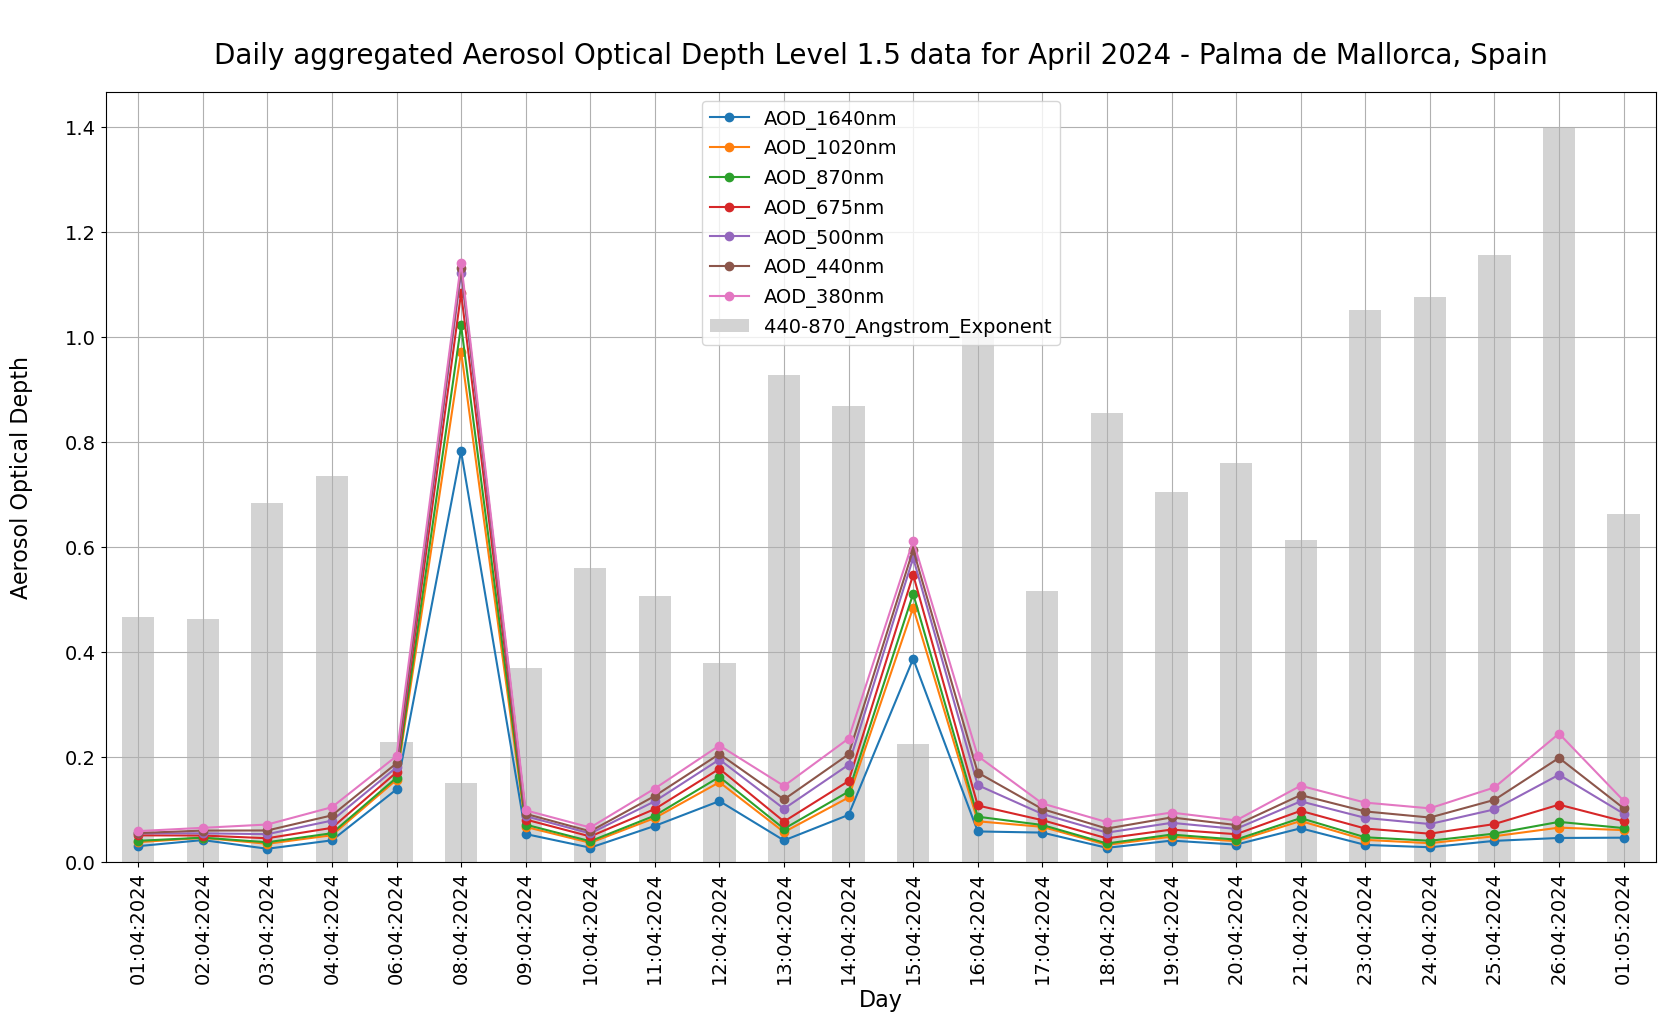

In [14]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax=plt.axes()

# Select pandas dataframe columns and define a line plot and bar plot
df_daily.filter(['AOD_1640nm', 
           'AOD_1020nm', 
           'AOD_870nm', 
           'AOD_675nm', 
           'AOD_500nm', 
           'AOD_440nm', 
           'AOD_380nm', 
           'AOD_340nm'][:-1]).plot(ax=ax,
                             style='o-')

df_daily['440-870_Angstrom_Exponent'][:-1].plot(kind='bar', color='lightgrey')

# Set title and axes lable information
plt.title('\nDaily aggregated Aerosol Optical Depth Level 1.5 data for April 2024 - Palma de Mallorca, Spain', fontsize=20, pad=20)
plt.ylabel('Aerosol Optical Depth\n', fontsize=16)
plt.xlabel('Day', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=14,loc=0)
plt.grid()


Above, you see elevated AOD values and low values for the Angstrom exponent for the Saharan dust event on 8 April 2024. Additionally, the time-series shows that there might have been a second dust event around 15th of April 2024. Let us inspect the daily aggregated values of AOD of another station, e.g. Ispra in Northern Italy for April 2024.

## Load and visualize AOD and AE for *Ispra* in April 2024

Let us load the daily aggregated Aerosol Optical Depth values for station Ispra in north Italy for April 2024. 

In [12]:
df_ispra = pd.read_table('../../eodata/2_observations/aeronet/202404_ispra_aod15_20.txt', delimiter=',', header=[7], index_col=1)
df_ispra = df_ispra.replace(-999.0, np.nan)
df_ispra

AERONET_Site Time(hh:mm:ss)  Day_of_Year  AOD_1640nm  \
Date(dd:mm:yyyy)                                                           
01:04:2024                 Ispra       12:00:00         92.0         NaN   
02:04:2024                 Ispra       12:00:00         93.0         NaN   
03:04:2024                 Ispra       12:00:00         94.0         NaN   
04:04:2024                 Ispra       12:00:00         95.0         NaN   
06:04:2024                 Ispra       12:00:00         97.0         NaN   
08:04:2024                 Ispra       12:00:00         99.0         NaN   
11:04:2024                 Ispra       12:00:00        102.0         NaN   
12:04:2024                 Ispra       12:00:00        103.0         NaN   
13:04:2024                 Ispra       12:00:00        104.0         NaN   
14:04:2024                 Ispra       12:00:00        105.0         NaN   
15:04:2024                 Ispra       12:00:00        106.0         NaN   
16:04:2024                 Ispra       12:00:00        107.0         NaN   
17:04:2024                 Ispra       12:00:00        108.0         NaN   
19:04:2024                 Ispra       12:00:00        110.0         NaN   
20:04:2024                 Ispra       12:00:00        111.0         NaN   
24:04:2024                 Ispra       12:00:00        115.0         NaN   
25:04:2024                 Ispra       12:00:00        116.0         NaN   
29:04:2024                 Ispra       12:00:00        120.0         NaN   
30:04:2024                 Ispra       12:00:00        121.0         NaN   
NaN               </body></html>            NaN          NaN         NaN   

                  AOD_1020nm  AOD_870nm  AOD_865nm  AOD_779nm  AOD_675nm  \
Date(dd:mm:yyyy)                                                           
01:04:2024          0.028475        NaN   0.032710   0.037243        NaN   
02:04:2024          0.022968        NaN   0.026615   0.029999        NaN   
03:04:2024          0.042963        NaN   0.048936   0.055226        NaN   
04:04:2024          0.100698        NaN   0.108097   0.115477        NaN   
06:04:2024          0.105120        NaN   0.111553   0.116818        NaN   
08:04:2024          0.437224        NaN   0.465217   0.483766        NaN   
11:04:2024          0.145856        NaN   0.157526   0.165570        NaN   
12:04:2024          0.141392        NaN   0.153115   0.160947        NaN   
13:04:2024          0.070215        NaN   0.074897   0.077876        NaN   
14:04:2024          0.047803        NaN   0.055653   0.061611        NaN   
15:04:2024          0.179134        NaN   0.199888   0.216441        NaN   
16:04:2024          0.024000        NaN   0.028581   0.032175        NaN   
17:04:2024          0.016077        NaN   0.020254   0.023197        NaN   
19:04:2024          0.028700        NaN   0.033454   0.037154        NaN   
20:04:2024          0.016966        NaN   0.021155   0.024569        NaN   
24:04:2024          0.029825        NaN   0.035670   0.040456        NaN   
25:04:2024          0.035504        NaN   0.048508   0.059609        NaN   
29:04:2024          0.187442        NaN   0.198817   0.207366        NaN   
30:04:2024          0.274391        NaN   0.288517   0.298562        NaN   
NaN                      NaN        NaN        NaN        NaN        NaN   

                  AOD_667nm  ...  N[440-675_Angstrom_Exponent]  \
Date(dd:mm:yyyy)             ...                                 
01:04:2024         0.044472  ...                          15.0   
02:04:2024         0.034433  ...                         118.0   
03:04:2024         0.062700  ...                           7.0   
04:04:2024         0.126420  ...                          15.0   
06:04:2024         0.125141  ...                          35.0   
08:04:2024         0.508926  ...                          65.0   
11:04:2024         0.175151  ...                         141.0   
12:04:2024         0.169305  ...                         118.0   
13:04:2024    

And now, let us use again the plotting code from above and visualize the daily aggregated Aerosol Optical Depth information for Ispra in April 2024. Additionally to the AOD values as line plot, we add the `440-870_Angstrom_Exponent` column as bar plot. You see, that Ispra has elevated AOD measurements as well on 8th and 15th April 2024, however the Ispra region was not as affected by dust as the station in Palma de Mallorca.

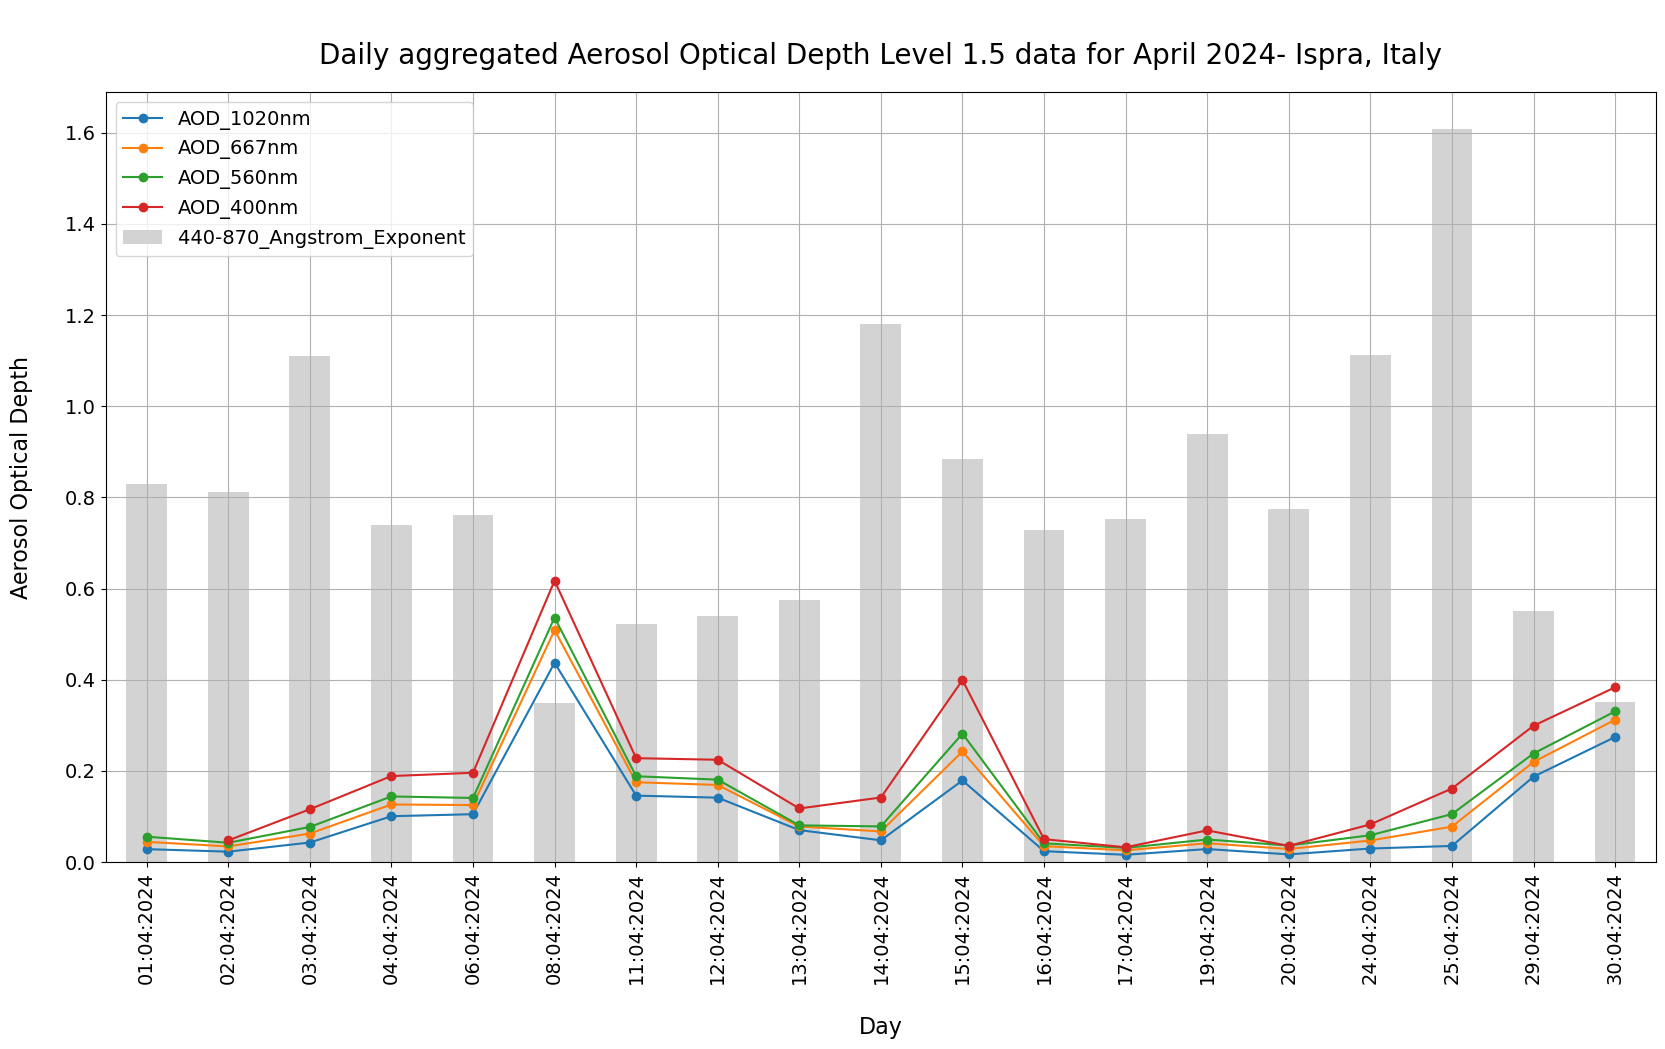

In [13]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax=plt.axes()

# Select pandas dataframe columns and define a line plot and bar plot
df_ispra.filter(['AOD_1020nm',  
           'AOD_667nm', 
           'AOD_560nm',
           'AOD_400nm', 
           'AOD_400nm'][:-1]).plot(ax=ax,
                             style='o-')

df_ispra['440-870_Angstrom_Exponent'][:-1].plot(kind='bar', color='lightgrey')

# Set title and axes lable information
plt.title('\nDaily aggregated Aerosol Optical Depth Level 1.5 data for April 2024- Ispra, Italy', fontsize=20, pad=20)
plt.ylabel('Aerosol Optical Depth\n', fontsize=16)
plt.xlabel('\nDay', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=14,loc=0)
plt.grid()